# Docs Figure

Create figure for the index page of the docs

## Import packages & data

In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import matplotlib.cm as cm

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo', dpi_save=300, format='png')
scv.settings.figdir = '../../figures/dfig_fate_map/'
scv.settings.plot_prefix = 'cellrank_'
cr.settings.verbosity = 2

In [2]:
adata = scv.read('../../datasets/pancreas/endocrinogenesis_day15.5.h5ad')
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.81 0.19]


AnnData object with n_obs × n_vars = 2531 × 27998
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta'
    var: 'highly_variable_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'day_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

## Pre-process the data

In [3]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
Logarithmized X.
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:02)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


## Run scVelo

In [4]:
try:
    import scachepy
    c = scachepy.Cache('../../cached_files/basic_tutorial/')
    c.tl.recover_dynamics(adata, force=False)
except ModuleNotFoundError:
    print("You don't seem to have scachepy installed, but that's fine, you just have to be a bit patient (~10min). ")
    scv.tl.recover_dynamics(adata)

Loading data from: `recover_dynamics.pickle`.


In [5]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


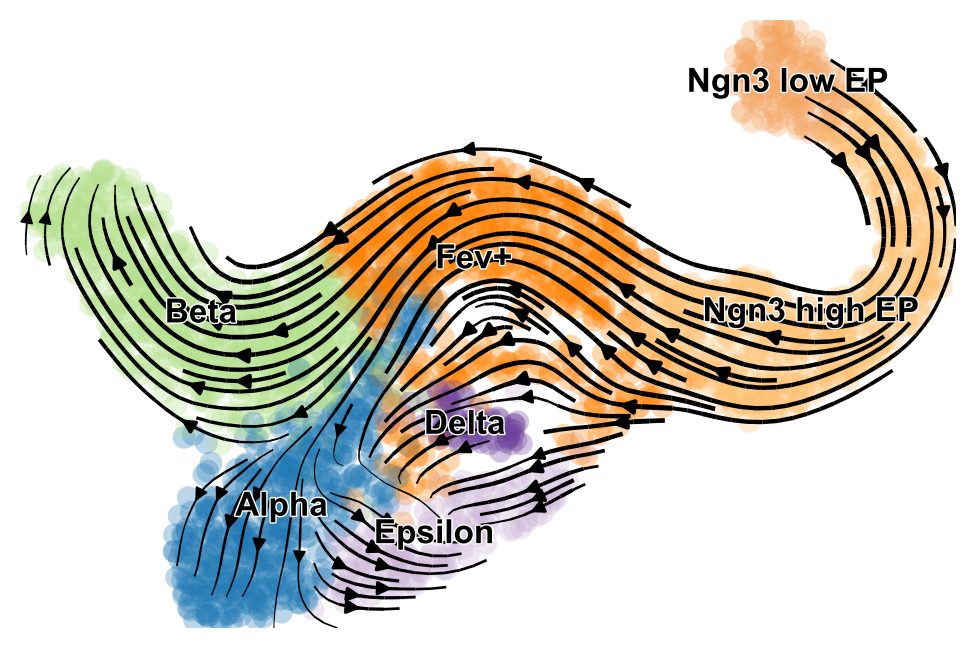

In [6]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4)

## Run CellRank

In [7]:
scv.tl.velocity_graph(adata, mode_neighbors='connectivities', compute_uncertainties=True)

computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Identify final states

Final states can be computed by running the following command:

In [8]:
cr.tl.final_states(adata, cluster_key='clusters', use_velocity_uncertainty=True)

Computing `final_states`
Computing transition matrix based on velocity correlations
    Finish (0:00:00)
Computing eigendecomposition of transition matrix
Computing metastable states
INFO: Using pre-computed schur decomposition
Adding `.schur_vectors`
       `.metastable_states`
       `.coarse_T`
       `.coarse_stationary_distribution`
    Finish (0:00:00)
Adding `.lineage_probabilities
       `.diff_potential`


saving figure to file ../../figures/dfig_fate_map/cellrank_fate_map.png


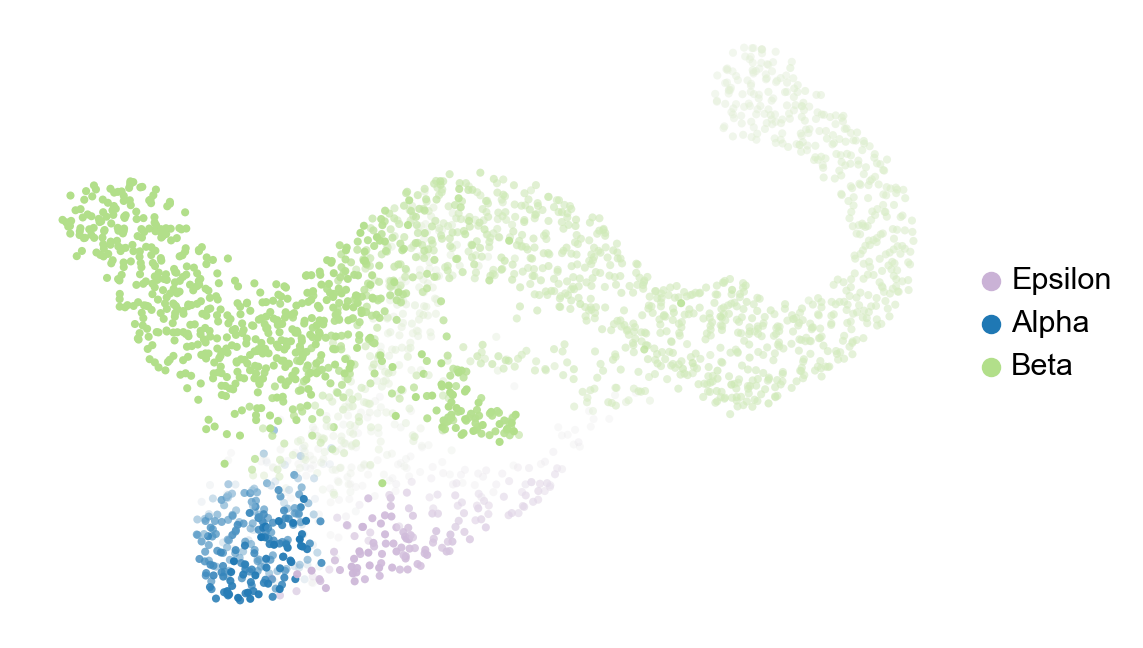

In [9]:
scv.pl.scatter(adata, color='final_states', color_gradients='to_final_states', legend_loc='right margin', 
               save='fate_map')